다중공선성의 개념과 진단법은 넘기고

다중공선성 해결 방법은 크게 3가지가 있다.
1. 변수 정규화
2. 변수 제거
3. PCA(주성분 분석)

**변수 정규화**

# train 데이터의 VIF 계수 출력



vif = pd.DataFrame()

vif["VIF Factor"] = [variance_inflation_factor(train.values, i) for i in range(train.shape[1])]

vif["features"] = train.columns 

vif



# MinMaxScaler를 통해 변수 정규화

scaler = MinMaxScaler()

scaler.fit(train) # fit 함수를 이용해  scaler 학습

train_scale = scaler.transform(train)# "scaler"를 통해 train의 수치들을 변환 시키고 train_scale에 저장 해 주세요.





# Sclaer 를 통해 변환된 데이터의 VIF 확인

new_train_df =  pd.DataFrame(train_scale)

new_train_df.columns = train.columns



vif = pd.DataFrame()

vif["VIF Factor"] = [variance_inflation_factor(new_train_df.values, i) for i in range(new_train_df.shape[1])]

vif["features"] = new_train_df.columns 

vif

**변수 제거**

# train 데이터의 VIF 계수 출력



vif = pd.DataFrame()

vif["VIF Factor"] = [variance_inflation_factor(train.values, i) for i in range(train.shape[1])]

vif["features"] = train.columns 

vif



# 종속변수인 quality를 제외 한 vif 10이상 변수 제거



new_train = train.drop(['alcohol','fixed acidity','total sulfur dioxide','density','pH','sulphates'],axis=1)



# VIF 10이상의 변수 제거 후 VIF 다시 확인



new_train_df =  pd.DataFrame(new_train)

new_train_df.columns = new_train.columns



vif = pd.DataFrame()

vif["VIF Factor"] = [variance_inflation_factor(new_train_df.values, i) for i in range(new_train_df.shape[1])]

vif["features"] = new_train_df.columns 

vif

**PCA**

**차원 축소?**

차원 축소는 많은 피처로 구성된 다차원 데이터 셋의 차원을 축소해 새로운 차원의 데이터 셋을 생성하는 것 입니다.  

일반적으로 차원이 증가할수록 데이터 포인트 간의 거리가 기하급수적으로 멀어지게 되고, 희소(sparse)한 구조를 가지게 됩니다.  

수백 개 이상의 피처로 구성된 데이터 셋의 경우 상대적으로 적은 차원에서 학습된 모델보다 예측 신뢰도가 떨어집니다. 

또한 피처가 많은 경우 개별 피처 간의 상관관계가 높을 가능성이 큽니다.  





선형 회귀와 같은 선형 모델에서는 입력 변수 간의 상관관계가 높을 경우, 이로 인한 다중 공선성 문제로 모델의 예측 성능이 떨어집니다.

그리고 수십 개 이상의 피처가 있는 데이터의 경우 이를 시각적으로 표현해 데이터의 특성을 파악하기는 불가능 합니다.  



이 경우 3차원 이하의 차원 축소를 통해서 시각적으로 데이터를 압축해서 표현할 수 있습니다. 

또한 차원 축소를 할 경우 학습 데이터의 크기가 줄어들어서 학습에 필요한 처리 능력도 향상 시킬 수 있습니다.  



일반적으로 차원 축소는feature selection 과 feature extraction으로 나눌 수 잇습니다.  

feature selection 은 말 그대로 특정 피처에 종속성이 강한 불필요한 피처는 아예 제거하고, 데이터의 특징을 잘 나타내는 주요 피처만 선택하는 것이다.

feature extraction은 기존 피처를 저 차원의 중요 피처로 압축해서 추출하는 것이다.

새롭게 추출된 중요 특성은 기존의 피처가 압축된 것이므로 기존의 피처와는 완전히 다른 값이 된다.



다중공선성을 해결하는 방법 중 하나 인 PCA의 경우 feature extraction의 기법 중 하나 입니다. 



feature extraction🥁


기존 피처를 단순 압축이 아닌, 함축적으로 더 잘 설명할 수 있는 또 다른 공간으로 매핑 해 추출하는 것입니다.

학생을 평가하는 다양한 요소로 모의고사 성적, 종합 내신 성적 , 수능성적 등 관련된 여러 가지 피처로 되어있는 데이터 셋이라면 이를 학업 성취도, 커뮤니케이션 능력,문제 해결력과 같은 더 함축적인 요약 특성으로 추출할 수 있습니다.

이번 시간에는 PCA의 상위 개념인 차원 축소와 feature extraction에 대해 알아보았습니다. 다음 시간에는 PCA의 개념에 대해 알아 보도록 하겠습니다.

**PCA?**

차원 축소 기법 중 가장 대표적인 기법인 PCA는 여러 변수 간에 존재하는 상관관계를 이용해 이를 대표하는 주성분을 추출해 차원을 축소하는 기법입니다.

PCA는 기존 데이터의 정보 유실 최소화를 위해 가장 높은 분산을 가지는 데이터 축을 찾아 해당 축으로 차원을 축소합니다.



키와 몸무게 2개의 피처를 가지고 있는 데이터셋이 다음과 같이 구성 되어 있다고 가정 해보겠습니다.

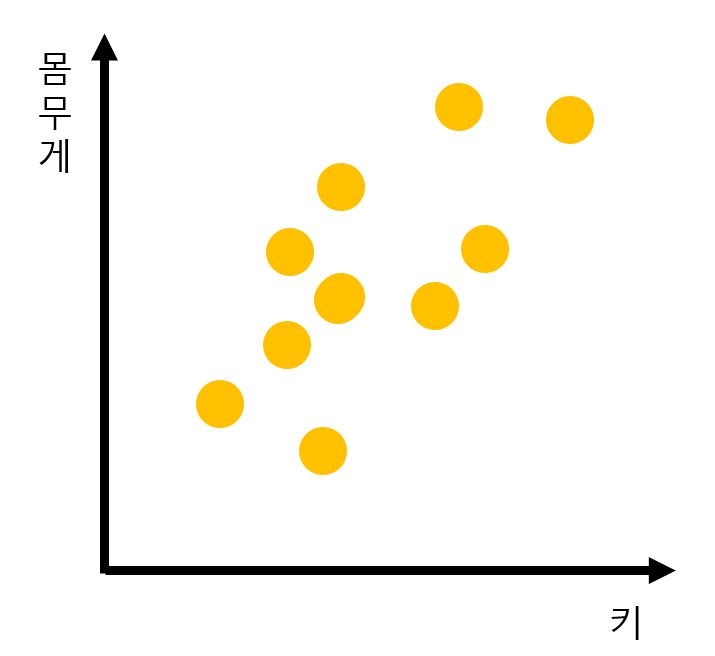

이 2개의 피처를 한개의 주성분을 가진 데이터 셋으로 차원축소하는 과정은 다음과 같습니다.



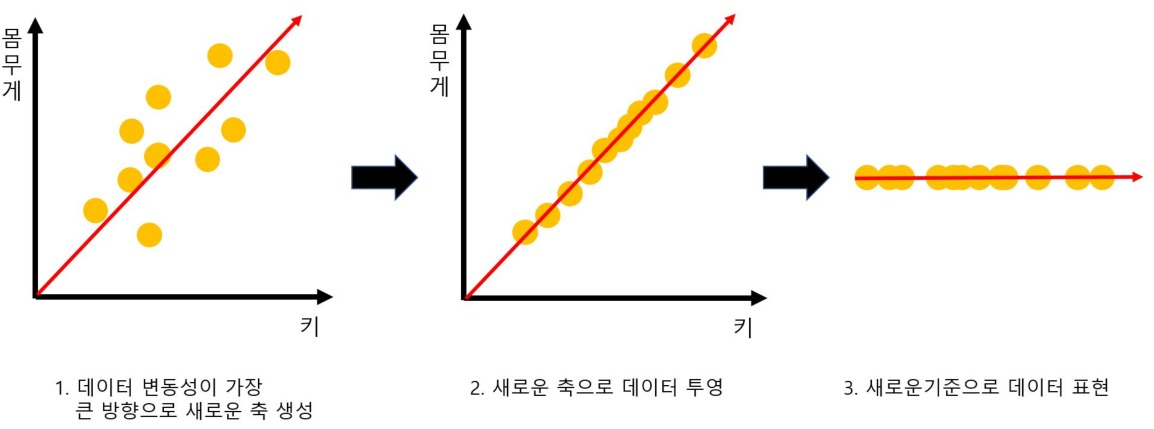



PCA는 제일 먼저 가장 큰 데이터 변동성을 기반으로 첫 번째 벡터 축을 생성하고,

두 번째 축은 이 벡터 축에 직각이 되는 벡터(직교 벡터)를 축으로 합니다.

세 번째 축은 다시 두 번째 축과 직각이 되는 벡터를 설정하는 방식으로 축을 생성합니다.

이렇게 생성된 벡터 축에 원본 데이터를 투영하면 벡터 축의 개수 만큼의 차원으로 원본 데이터가 차원 축소 됩니다.



요약하면 PCA는 많은 속성으로 구성된 원본 데이터를 그 핵심을 구성하는 데이터로 압축한 것 입니다.



실습은 다른 파일로 저장했음